In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = load_iris()
print("iris_data keys and format\n",data.keys())

iris_data keys and format
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# dataframe 생성전 data 재설정 
iris_data = data['data']
iris_cols = data['feature_names']
print("iris datasets columns\n",iris_cols)

iris datasets columns
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
iris_cols=['sep_len', 'sep_wt', 'pet_len', 'pet_wt']

In [6]:
iris_df = pd.DataFrame(data= iris_data, columns=iris_cols)
print("iris_df\n",iris_df.head(5))

iris_df
    sep_len  sep_wt  pet_len  pet_wt
0      5.1     3.5      1.4     0.2
1      4.9     3.0      1.4     0.2
2      4.7     3.2      1.3     0.2
3      4.6     3.1      1.5     0.2
4      5.0     3.6      1.4     0.2


In [10]:
iris_df['label']=data['target']
print(iris_df.head(5))

   sep_len  sep_wt  pet_len  pet_wt  label
0      5.1     3.5      1.4     0.2      0
1      4.9     3.0      1.4     0.2      0
2      4.7     3.2      1.3     0.2      0
3      4.6     3.1      1.5     0.2      0
4      5.0     3.6      1.4     0.2      0


In [12]:
check_df = iris_df.groupby('label').count()
print(check_df)

       sep_len  sep_wt  pet_len  pet_wt
label                                  
0           50      50       50      50
1           50      50       50      50
2           50      50       50      50


In [15]:
#LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

x_train = iris_df[iris_cols]
y_train = iris_df['label']

#LDA setting -> use transform
lda = LDA().fit(x_train,y_train)
y_pred = pd.DataFrame(lda.predict(x_train))
print("예측결과\n",y_pred.head(5))
y_pred_score=pd.DataFrame(lda.predict_proba(x_train))
print("예측스코어\n",y_pred_score.head(5))
print("예측정확도\n",lda.score(x_train,y_train)) #독립변수와 종속변수

예측결과
    0
0  0
1  0
2  0
3  0
4  0
예측스코어
      0             1             2
0  1.0  3.896358e-22  2.611168e-42
1  1.0  7.217970e-18  5.042143e-37
2  1.0  1.463849e-19  4.675932e-39
3  1.0  1.268536e-16  3.566610e-35
4  1.0  1.637387e-22  1.082605e-42
예측정확도
 0.98


In [16]:
# 분류 결과 확인하기
from sklearn.metrics import confusion_matrix

conf_df = pd.DataFrame(confusion_matrix(y_train, lda.predict(x_train)))
conf_df.columns=['pred 0', 'pred 1', 'pred 2']#setosa,versicolor,virginica
conf_df.index = ['real 0', 'real 1', 'real 2']
print('Confusion Matrix \n',conf_df) 


Confusion Matrix 
         pred 0  pred 1  pred 2
real 0      50       0       0
real 1       0      48       2
real 2       0       1      49


(150, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


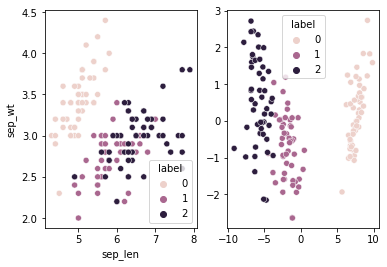

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis()

X_lda = cld.fit_transform(x_train, y_train)
print(X_lda.shape)
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(iris_df['sep_len'], iris_df['sep_wt'], 
                hue=iris_df['label'], ax=ax[0])
sns.scatterplot(X_lda[:,0], X_lda[:,1], hue=y_train, ax=ax[1])
plt.show()